In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import math

In [4]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=1, with_info=1)

In [5]:
metadata

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.0,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [9]:
train_dataset, test_dataset = dataset['train'], dataset['test']
num_train_ex = metadata.splits['train'].num_examples
num_test_ex = metadata.splits['test'].num_examples
num_train_ex, num_test_ex

(60000, 10000)

In [10]:
class_names = {
0:'Top',
1:'Trouser',
2:'Pullover',
3:'Dress',
4:'Coat',
5:'Sandal',
6:'Shirt',
7:'Sneaker',
8:'Bag',
9:'AnkleBoot'}
class_label = [class_names[x] for x in range(0, 10)]

In [14]:
def normalize(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255.
    return image, label

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

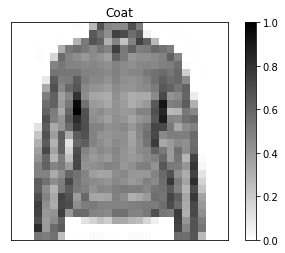

In [20]:
for image, label in test_dataset.take(1):
    break
    
image = image.numpy().reshape((28, 28))
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.grid(0)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.title(class_names[label.numpy()])
plt.show()

In [21]:
def get_model(input_shape, optimizer, loss, metrics):
    model = tf.keras.Sequential([
        ## First Convolution
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same',
                               activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPool2D((2, 2), strides=2),
        
        
        ## Second Convolution
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same',
                               activation='relu'),
        tf.keras.layers.MaxPool2D((2, 2), strides=2),
        
        ## Flatten
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax') #multiClass; binary:sigmoid
                ])
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=metrics)
    print (f"Model Summary\n{model.summary()}")
    return model

model = get_model(input_shape=(28, 28, 1),
                  optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [22]:
def train_model(model, train_set, epochs, batch_size, buffer_size, steps_per_epoch):
    train_set = train_set.repeat().shuffle(buffer_size).batch(batch_size)
    history = model.fit(train_set, epochs=epochs, steps_per_epoch=steps_per_epoch)
    return history

history = train_model(model, 
                      train_dataset, 
                      epochs=10, 
                      batch_size=32, 
                      buffer_size=num_train_ex,
                      steps_per_epoch=math.ceil(num_train_ex/32))


Train for 1875 steps
Epoch 1/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.4033 - accuracy: 0.8562
Epoch 2/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.2559 - accuracy: 0.9058
Epoch 3/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.2162 - accuracy: 0.9200
Epoch 4/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.1855 - accuracy: 0.9308
Epoch 5/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.1580 - accuracy: 0.9409
Epoch 6/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1331 - accuracy: 0.9507
Epoch 7/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.1133 - accuracy: 0.9574
Epoch 8/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0926 - accuracy: 0.9653
Epoch 9/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0815 - accuracy: 0.9701
Epoch 10/10
1875/1875 [====================

In [24]:
test_dataset = test_dataset.batch(32)
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_ex/32))
print (f"TestSet Accuracy: {test_accuracy:.3f}")

313/313 [==============================] - 5s 15ms/step - loss: 0.3173 - accuracy: 0.9145
TestSet Accuracy: 0.914
